# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [32]:
df= pd.read_excel('candyhierarchy2017.xlsx')
df.shape
df.describe

c:\Users\Start Up\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<bound method NDFrame.describe of       Internal ID Q1: GOING OUT? Q2: GENDER Q3: AGE Q4: COUNTRY  \
0        90258773            NaN        NaN     NaN         NaN   
1        90272821             No       Male      44        USA    
2        90272829            NaN       Male      49         USA   
3        90272840             No       Male      40          us   
4        90272841             No       Male      23         usa   
...           ...            ...        ...     ...         ...   
2455     90314359             No       Male      24         USA   
2456     90314580             No     Female      33         USA   
2457     90314634             No     Female      26        USA    
2458     90314658             No       Male      58         Usa   
2459     90314802             No     Female      66         usa   

     Q5: STATE, PROVINCE, COUNTY, ETC Q6 | 100 Grand Bar  \
0                                 NaN                NaN   
1                                  NM    

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

In [33]:
df.dtypes

df.isnull().sum()


Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [34]:
columns_to_keep = ['internal_id']  
 
threshold_col = 0.5 * len(df)
 
df = df[[col for col in df.columns if col in columns_to_keep or df[col].notnull().sum() > threshold_col]]
 
threshold_row = 0.7 * len(df.columns)
 
df = df.dropna(thresh=threshold_row)
df.drop_duplicates(inplace=True)





### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [35]:
df['Q1: GOING OUT?'].value_counts()
df['Q1: GOING OUT?'].fillna('No',inplace=True)

C:\Users\Start Up\AppData\Local\Temp\ipykernel_4060\2800980488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q1: GOING OUT?'].fillna('No',inplace=True)


### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [36]:
df['Q2: GENDER'].value_counts()
df['Q2: GENDER'].fillna('Other',inplace=True)

C:\Users\Start Up\AppData\Local\Temp\ipykernel_4060\782360018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Q2: GENDER'].fillna('Other',inplace=True)


### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [37]:
df['Q3: AGE'].dtypes
df['Q3: AGE'].value_counts()
df['Q3: AGE']=df['Q3: AGE'].replace('ancient',66)
df['Q3: AGE']=df['Q3: AGE'].replace('old enough',66)
df['Q3: AGE']=df['Q3: AGE'].replace('I can remember when Java was a cool new language',np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace('MY NAME JEFF',np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace('OLD',66)
df['Q3: AGE']=df['Q3: AGE'].replace( 'Over 50',np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace("Old enough" ,66)
df['Q3: AGE']=df['Q3: AGE'].replace("Many",np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace("?",np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace("no",np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace("45-55",np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace("hahahahaha",np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace("older than dirt",np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace( "Enough",np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace( "See question 2" ,np.nan)
df['Q3: AGE']=df['Q3: AGE'].replace("24-50" ,np.nan)

df['Q3: AGE']=pd.to_numeric(df['Q3: AGE'])


mean_value = df['Q3: AGE'].mean()
df['Q3: AGE']=df['Q3: AGE'].fillna(mean_value)
 
df['Q3: AGE'].value_counts()

df[['Q3: AGE']]


C:\Users\Start Up\AppData\Local\Temp\ipykernel_4060\3413834543.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q3: AGE']=df['Q3: AGE'].replace("24-50" ,np.nan)


,Q3: AGE
1,44.000000
3,40.000000
4,23.000000
5,43.499114
7,33.000000
...,...
2454,26.000000
2455,24.000000
2456,33.000000
2457,26.000000


### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [38]:
df['Q4: COUNTRY'].unique()
df['Q4: COUNTRY'].value_counts()
import pandas as pd
from fuzzywuzzy import process

 
data = {
     'Q4: COUNTRY': [
        'USA ', 'us', 'usa', None, 'canada', 'Canada', 'Us', 'US', 'Murica',
        'USA', 'United States', 'united states', 'Usa', 'United staes',
        'United Kingdom', 'United States of America', 'UAE',
        'United States ', 'canada ', 'United states', 'u.s.a.',
        'USAUSAUSA', 'america', 'france', 'United States of America ',
        'U.S.A.', 'Mexico', 'Canada ', 'united states of america',
        'US of A', 'UK', 'Unites States', 'North Carolina ', 'uk',
        'Netherlands', 'Europe', 'Earth', 'U S', 'u.s.', 'Costa Rica',
        'The United States of America', 'cascadia', 'insanity lately',
        'Greece', 'The United States', 'USA? Hard to tell anymore..',
        "'merica", 'Pittsburgh', 'United State', 'France', 'U.S.', 'A',
        'Can', 'Canae', 'New York', 'Trumpistan', 'Ireland',
        'United Sates', 'Korea', 'Australia', 'California', 'Japan', 'USa',
        'I pretend to be from Canada, but I am really from the United States.',
        'Usa ', 'Iceland', 'Canada`', 'Scotland', 'Denmark', 'France ',
        'Switzerland', 'Ahem....Amerca', 'South Korea', 'New Jersey',
        'CANADA', 'United Stated', 'Germany', 'America', 'United Statss',
        'endland', 'Atlantis', 'murrika', 'united States ', 'germany',
        'N. America', 'USSA', 'Taiwan', 'China', 'spain', 'U.S. ',
        'Narnia', 'u s a', 'United Statea',
        'subscribe to dm4uz3 on youtube', 'USA USA USA!!!!',
        "I don't know anymore", 'Fear and Loathing'
    ]
}

 
dff = pd.DataFrame(data)

 
standard_countries = ["United States", "Canada", "Mexico", "United Kingdom", "France", "Germany", "Egypt", "Australia", "China", "Japan", "South Korea"]

 
def clean_country_name(country_name, standard_countries):
    if pd.isna(country_name):
        return 'Unknown'   
    
    
    match = process.extractOne(country_name.strip(), standard_countries)
    
     
    return match[0] if match else 'Unknown'

 
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].apply(lambda x: clean_country_name(x, standard_countries))

 
print(df['Q4: COUNTRY'].value_counts())
df[ 'Q4: COUNTRY']=df[ 'Q4: COUNTRY'].fillna('United States')
df[ 'Q4: COUNTRY'].value_counts()

Q4: COUNTRY
United States     1352
Canada             161
Australia          144
Unknown             18
South Korea         17
Germany             13
Mexico               9
United Kingdom       7
Japan                5
France               4
China                4
Egypt                2
Name: count, dtype: int64


Q4: COUNTRY
United States     1352
Canada             161
Australia          144
Unknown             18
South Korea         17
Germany             13
Mexico               9
United Kingdom       7
Japan                5
France               4
China                4
Egypt                2
Name: count, dtype: int64

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [39]:
import pandas as pd
from fuzzywuzzy import process
 


data = {'Q4 : COUNTRY': [
    'NM', 'or', 'exton pa', None, 'ontario', 'Ontario', 'Wa', 'Quebec',
    'NY', 'California', 'Texas', 'NEW YORK', 'CO', 'Alberta', 'RI',
    'minnesota', 'Michigan', 'Florida', 'New Jersey', 'Colorado',
    'Los Angeles, California', 'CA', 'Chicago, Illinois', 'Wisconsin',
    'Minnesota ', 'London', 'mn', 'TEXAS', 'District of Columbia',
    'Washington', 'Massachusetts ', 'OR', 'Illinois', 'New York',
    'massachusetts', 'Abu Dhabi', 'TX', 'Dc', 'VA', 'MN', 'yukon',
    'Pennsylvania ', 'MD', 'Virginia', 'Alberta ', 'DC', 'Iowa', 'Mn',
    'TN', 'Ohio', 'Maryland', 'MI', 'Wisconsin ',
    'Colorado, Jefferson county ', 'Louisiana', 'pa',
    'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
    'Pennsylvania', 'north carolina', 'Tennessee ',
    'Knox county, Tennessee', 'New Mexico', 'Maine', 'maine',
    'Virginia, Arlington', 'WA', 'Illinois ', 'Il', 'New Hampshire ',
    'Washington ', 'Georgia', 'IL', 'BC', 'Oregon ',
    'Washington, Clark ', 'NE', 'Oklahoma', 'mi', 'Nevada', 'va',
    'California ', 'Oregon - but will be in Washington for Halloween',
    'Ri', 'Washington, King', 'MA', 'wa', 'PA', 'md', 'North Carolina',
    'pennsylvania', 'PEnnsylvania', 'Alabama', 'GA', 'california ',
    'South Carolina', 'Massachusetts', 'Baja California', 'IN', 'Ny',
    'illinois', 'Santa Cruz County, California', 'MARYLAND',
    'North Dakota', 'NC', 'Colorado ', 'Kansas ', 'Oxfordshire',
    'British Columbia', 'Nebraska', 'West Virginia', 'USA ', 'ohio',
    'ma', 'nc', 'Minnesota', 'Bc', 'philadelphia', 'Kentucky', 'HI',
    'South Holland', 'Massachusetts, Plymouth county', 'hi', 'Co',
    'New York ', 'vt', 'CA, Alameda', 'Utah', 'FL',
    'Michigan, Shiawassee County', 'Missouri', 'Indiana', 'wisconsin',
    'Idaho ada', 'La', 'America', 'Hawaii', 'California, Alameda',
    'Az', 'Arizona', 'VT', 'Sub Earth', 'North dakota', 'virginia',
    'Ca', 'MO', 'alameda county, california', 'Greater London',
    'Texas ', 'bc', 'WV, Kanawha County ', 'Florida ', 'ca',
    'Washington State', 'Alaska', 'Washington, King County',
    'San Jose', 'florida', 'AZ', 'Connecticut', 'New Jersey ', 'ON',
    'South Carolina ', 'texas', 'newfoundland', 'AB', 'mississippi',
    'Oklahoma ', 'washington', 'Manchester', 'cascadia', 'in',
    'rhode island', 'Ohio ', 'Pa', 'FL ', 'CT',
    'oblivion if things keep going this way', 'Montana', 'connecticut',
    'British Columbia ', 'Nunya, Bizness, USA', 'OH',
    'Washington state', 'Oakland, California', 'Ontario,  Canada',
    'phoenix, maricopa county, arizona', 'Merlin', 'NS',
    'Washington state, Kitsap County', 'cailifornia', 'QC',
    'Missouri ', 'Pittsburgh pa', 'Washington, seattle, king',
    'Massachussets ', 'NJ', 'Derbyshire', 'Whatcom County, WA', 'Mt',
    'NH', 'Ma', 'KS', 'Oakland County, Michigan', 'Marne',
    'Noord-Holland', 'Tennessee, Knox County', 'Henrico, VA',
    'Washington State, King County, City of Seattle', 'Washington, DC',
    'nyc', 'Brooklyn', 'Santa Barbara co. California', 'Maryland ',
    'Ky', 'New Orleans la ', 'COLORADO', 'Nh', 'A', 'ri',
    'Kalamazoo County, MI', 'OREGON', 'Wi', 'Ontario ', 'wv',
    'ulster county, NY', 'NJ, Gloucester', 'Mi', 'calif', 'Or', 'tn',
    'MS', 'Queens', 'Vermont', 'Kildare', 'Vermont ', 'ND',
    'tennessee', 'Washington DC', 'oregon', 'Kings, New York ', 'Cook',
    'Toronto, Ontario', 'Victoria', 'Virginia ', 'On', 'nova scotia',
    'Tehama', 'suffolk county ny', 'Santa Clara County, California',
    'SC', 'louisiana', 'Md', 'IA', 'Colorado larimer county', 'Tokyo',
    'ont', 'tx', 'Califor', 'Idaho', 'Kansas', 'NV',
    'Brooklyn, kings county ny', 'california', 'WI',
    'Carver county, MN', 'DUTCHESS COUNTY NY', 'Ny ', 'Wyoming ',
    'colorado', 'british columbia', 'California, San Francisco',
    'Glendora, Los Angeles, California', 'Edinburgh', 'Strathclyde',
    'Ørbæk', 'Idf', 'Osaka', 'Surrey', 'Vaud', 'Arizona ', 'Michigan ']}




dfff = pd.DataFrame(data)


reference_areas = [
    
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming',

    'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
    'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island',
    'Quebec', 'Saskatchewan',
    
    'District of Columbia', 'Unknown', 'Other']



def clean_area(value, reference_areas):
    if pd.isna(value) or value.strip().lower() in ['unknown', 'random text', '12345']:
        return "Unknown"
    match = process.extractOne(value, reference_areas, score_cutoff=80)  
    return match[0] if match else "Other"


df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].apply(lambda x: clean_area(str(x), reference_areas))


print(df['Q5: STATE, PROVINCE, COUNTY, ETC'].value_counts())


Q5: STATE, PROVINCE, COUNTY, ETC
Other                        366
California                   253
Illinois                      80
Ontario                       58
Michigan                      53
Washington                    52
Texas                         51
Oregon                        49
Ohio                          44
Delaware                      44
New York                      42
Pennsylvania                  38
Alabama                       37
Colorado                      36
Florida                       36
Massachusetts                 35
Wisconsin                     31
Nevada                        29
Virginia                      28
Alberta                       26
Arizona                       26
Maryland                      19
Connecticut                   19
Minnesota                     19
Montana                       19
Maine                         19
Indiana                       18
Georgia                       16
North Carolina                16
Missouri  

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

c:\Users\Start Up\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Start Up\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


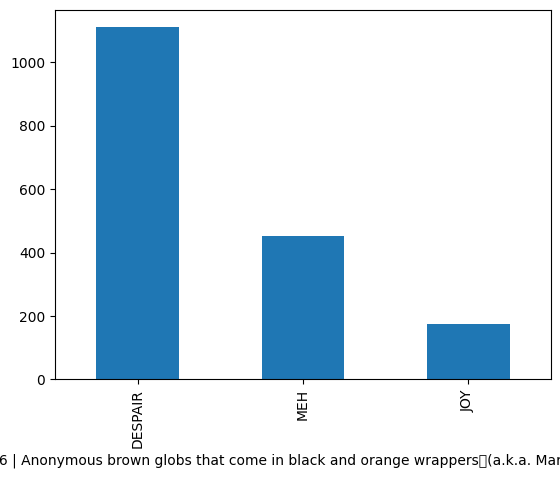

In [40]:
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].value_counts()
df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)']=df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].fillna('DESPAIR')
most_kind_ofchocolate=df['Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)'].value_counts().plot(kind='bar')

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [41]:
print(df['Q10: DRESS'].value_counts())
df['Q10: DRESS']=df['Q10: DRESS'].fillna('White and gold')
print(df['Q10: DRESS'].value_counts())

Q10: DRESS
White and gold    1046
Blue and black     615
Name: count, dtype: int64
Q10: DRESS
White and gold    1121
Blue and black     615
Name: count, dtype: int64


### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [42]:
print(df['Q11: DAY'].value_counts())
df['Q11: DAY']=df['Q11: DAY'].fillna('Friday')
print(df['Q11: DAY'].value_counts())

Q11: DAY
Friday    1056
Sunday     622
Name: count, dtype: int64
Q11: DAY
Friday    1114
Sunday     622
Name: count, dtype: int64


### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [44]:
df['Q6 | York Peppermint Patties'].value_counts()
df['Q6 | York Peppermint Patties']=df['Q6 | York Peppermint Patties'].fillna('JOY')
df['Q12: MEDIA [Science]'].value_counts() 
df['Q12: MEDIA [Science]']=df['Q12: MEDIA [Science]'].fillna(1)
df['Click Coordinates (x, y)'].value_counts()
df['Click Coordinates (x, y)']=df['Click Coordinates (x, y)'].fillna('(77, 24)')
df.isna().sum()

Internal ID                     0
Q1: GOING OUT?                  0
Q2: GENDER                      0
Q3: AGE                         0
Q4: COUNTRY                     0
                               ..
Q6 | York Peppermint Patties    0
Q10: DRESS                      0
Q11: DAY                        0
Q12: MEDIA [Science]            0
Click Coordinates (x, y)        0
Length: 113, dtype: int64

### 14 - write a summary about all the cleaning steps 

In [ ]:
First, we start by displaying the data we have to take a look at it. If there are columns or rows that have no value or most of them are empty, we delete them. 
Then we examine each column separately. We see the type of the column. If there is a difference in the type of the column, we must unify it. 
Each column must have its own type. For example, if it is ordered, it is float. Thus, we see the Nan values in each column. We calculate the Nan values according to how we deal with each column, from replacing them with the maximum value in the column or other. If they will affect the column, 
they must be replaced with the most appropriate value so that they do not affect the column. If they are extreme values, they must be deleted.
 If there are inappropriate column names, they must be changed. If there are repeated rows or columns, they must be deleted. If there are similar names that indicate the same thing, they must be unified as we dealt with Country. 
 If there is a date, it must be given the correct format.

<Axes: >

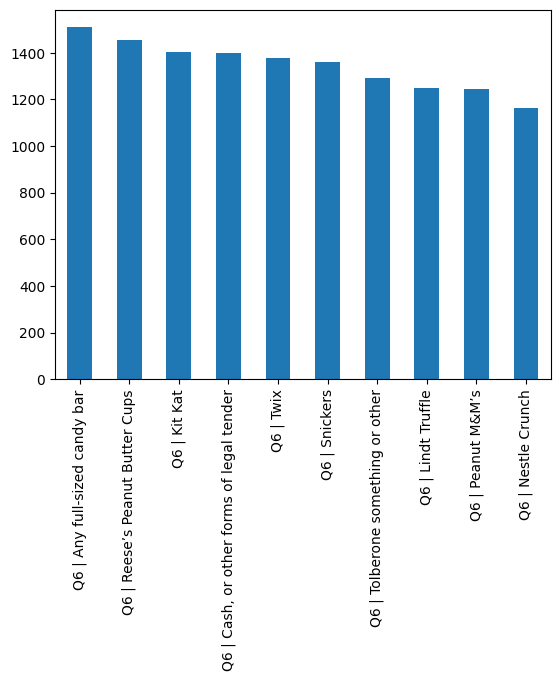

In [47]:
chocolate=df.filter(like='Q6')
joy_counts=(chocolate=='JOY').sum()
DESPAIR_counts=(chocolate=='DESPAIR').sum()
the_10_most_loved=joy_counts.sort_values(ascending=False).head(10)
the_10_most_loved.plot(kind='bar')

<Axes: >

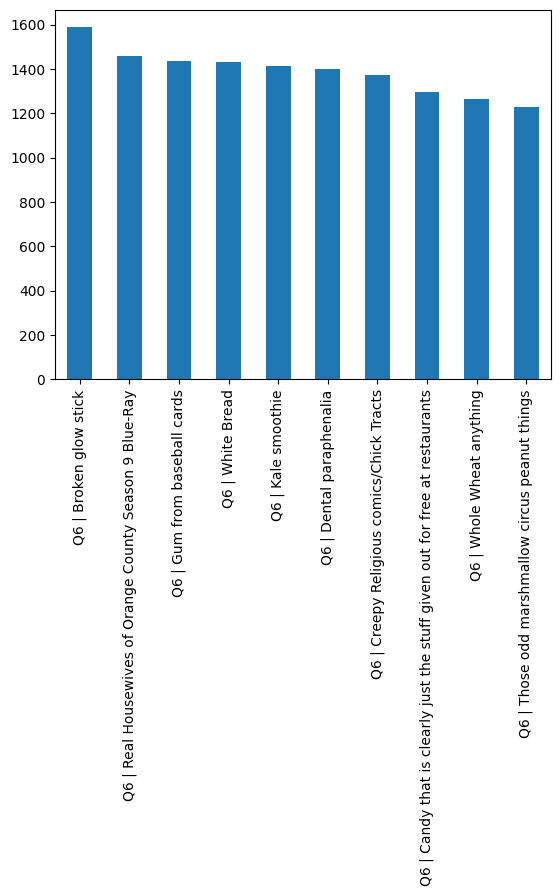

In [48]:
the_10_least_like_chocolate=DESPAIR_counts.sort_values(ascending=False).head(10)
the_10_least_like_chocolate.plot(kind='bar')
